# Calling the SHARE API
----
Here are some working examples of how to query the current scrAPI database for metrics of results coming through the SHARE Notifiation Service.

*these slides and example notebooks*:  https://osf.io/bygau/

slides also here: https://github.com/erinspace/share_tutorials

## Setup

- All of the examples I use here will be using python and some basic libraries
    - [Here's a basic guide to getting started with python](https://wiki.python.org/moin/BeginnersGuide)
- Code and setup instructions on github at:
     - https://github.com/erinspace/share_tutorials

- To run these examples on your machine, you'll need to install some basic python packages
    - Make sure to use a virtual enviornment to install python packages:
        - https://virtualenv.readthedocs.org/en/latest/
    - Using your terminal, run ```pip install -r requirements.txt``` inside your virtual enviornment
- Run the Jupyter notebook server from the command line:
    ```jupyter notebook```

### Get a List of the Current SHARE Providers
----
We'll make an API call to find:
- The official name of each SHARE Provider
- The URL for the home page of each SHARE Provider
- The shortname, or nickname of the SHARE provider for internal use
    - We'll use this name when querying for documents from this source

In [47]:
import requests

data = requests.get('https://osf.io/api/v1/share/providers/').json()

In [48]:
# Let's kook at the outer layer of data
data['providerMap'].keys()[:5]

[u'doepages',
 u'scholarsphere',
 u'scholarsarchiveosu',
 u'utaustin',
 u'scholarworks_umass']

#### See what else is there

Let's display this in a way that shows all of the infomration

In [49]:
import requests
from IPython.display import Image, display

data = requests.get('https://osf.io/api/v1/share/providers/').json()
for source in data['providerMap'].keys():
    display(Image(url=data['providerMap'][source]['favicon']))
    print(
        '{}'.format(
            data['providerMap'][source]['long_name'].encode('utf-8')
        )
    )

Department of Energy Pages


ScholarSphere @ Penn State University


ScholarsArchive@OSU


University of Texas at Austin Digital Repository


ScholarWorks@UMass Amherst


Apollo @ University of Cambridge


DSpace at Texas State University


Open Science Framework


Lake Winnipeg Basin Information Network


Research Online @ University of Wollongong


Florida Institute of Technology


The OAKTrust Digital Repository at Texas A&M


Deep Blue @ University of Michigan


Cognitive Sciences ePrint Archive


Trace: Tennessee Research and Creative Exchange


DigitalCommons@PCOM


Smithsonian Digital Repository


Cleveland State University's EngagedScholarship@CSU


BioMed Central


United States Geological Survey


CrossRef


PURR - Purdue University Research Repository


DigitalCommons@University of Nebraska - Lincoln


VCU Scholars Compass


DataONE: Data Observation Network for Earth


Carnegie Mellon University Research Showcase


NIST MaterialsData


University of Delaware Institutional Repository


University of South Florida - Scholar Commons


RCAAP - Repositório Científico de Acesso Aberto de Portugal


Calhoun: Institutional Archive of the Naval Postgraduate School


Mason Archival Repository Service


UNC-Greensboro


Digital Commons @ Kent State University Libraries


University of Tennessee at Chattanooga


MOspace: University of Missouri


Arizona State University Digital Repository


Nature Publishing Group


Zenodo


Digital Commons @ CalPoly


Ghent University Academic Bibliography


NeuroVault.org


Public Library of Science


The Digital Archaeological Record


Virginia Tech VTechWorks


Earth System Grid at NCAR


Duke University Libraries


Scholars Bank University of Oregon


DataCite MDS


PAPYRUS - Dépôt institutionnel de l'Université de Montréal


Huskie Commons @ Northern Illinois University


UKnowledge @ University of Kentucky


eScholarship@UMMS


KU ScholarWorks


Pontifical Catholic University of Rio de Janeiro


Digital Commons @ Trinity University


PDXScholar Portland State University


Digital Repository @ Iowa State University


Speech and Language Data Repository (SLDR/ORTOLANG)


CU Scholar University of Colorado Boulder


PubMed Central


City University of New York


CyberLeninka - Russian open access scientific library


WHOAS at MBLWHOI Library


Springer


SHAREOK Repository


Dryad Data Repository


Scholars Portal dataverse


National Oceanographic Data Center


Biodiversity Heritage Library OAI Repository


K-State Research Exchange


Digital Access to Scholarship at Harvard


London School of Hygiene and Tropical Medicine Research Online


Digital Commons @ Wayne State


OpenSIUC at the Southern Illinois University Carbondale


Hacettepe University DSpace on LibLiveCD


eScholarship @ University of California


Inter-University Consortium for Political and Social Research


Digital Commons @ Illinois Wesleyan University


New Prairie Press at Kansas State University


Social Science Research Network


CaltechAUTHORS


Washington State University Research Exchange


Harvard Dataverse


DoE's SciTech Connect Database


DSpace@MIT


Érudit


NIH Research Portal Online Reporting Tools


The repository at St Cloud State


Columbia Academic Commons


figshare


CiteSeerX Scientific Literature Digital Library and Search Engine


Addis Ababa University Institutional Repository


ArXiv


Digital Howard @ Howard University


Washington University Open Scholarship


ClinicalTrials.gov


Iowa Research Online


Valparaiso University ValpoScholar


Chapman University Digital Commons


University of Pennsylvania Scholarly Commons


eLife Sciences


ResearchWorks @ University of Washington


University of Illinois at Urbana-Champaign, IDEALS


## SHARE Schema

Required fields:
- title
- contributors
- uris
- providerUpdatedDateTime

We add some information after each document is harvested inside the field shareProperties, including:
- source (where the document was originally harvested)
- docID  (a unique identifier for that object from that source)

These two fields can be combined to make a unique document identifier.

See more details about the SHARE Schema, including examples of documents with all of the fields, here:
https://osf.io/wunk7/wiki/home/?view

## Simple Queries

- We need a URL to use to access the SHARE API.
- We will add arguments to this URL to shape our request
    - size: how many results we'll return
    - sort: how we want the results to be sorted
    - from: where to start in the resutls returned

In [50]:
OSF_APP_URL = 'https://osf.io/api/v1/share/search/'

In [51]:
import furl

search_url = furl.furl(OSF_APP_URL)
search_url.args['size'] = 3
search_url.args['sort'] = 'providerUpdatedDateTime'
search_url.args['from'] = 5

### Our Query URL So far

In [52]:
print('The request URL is {}'.format(search_url.url))

The request URL is https://osf.io/api/v1/share/search/?size=3&sort=providerUpdatedDateTime&from=5


### Our results

In [53]:
from datetime import datetime

recent_results = requests.get(search_url.url).json()

for result in recent_results['results']:
    print(
        '{} -- from {} -- updated on {}'.format(
            result['title'].encode('utf-8'),
            result['shareProperties']['source'],
            datetime.strftime(datetime.strptime(result['providerUpdatedDateTime'], "%Y-%m-%dT%H:%M:%S+00:00"), '%B %d %Y')
        )
    )

Efficient Equilibria in the Voluntary Contributions Mechanism with Private Information -- from caltech -- updated on March 17 2016
Federal Mandates with Local Agenda Setters -- from caltech -- updated on March 17 2016
Making do with imperfect law: small firms in France and Germany, 1890-1935 -- from caltech -- updated on March 17 2016


### Narrowing Results by Source

In [54]:
search_url.args['q'] = 'shareProperties.source:mit'
recent_results = requests.get(search_url.url).json()

print('The request URL is {}'.format(search_url.url))
print('---------')
for result in recent_results['results']:
    print(
        '{} -- from {} -- updated on {}'.format(
            result['title'].encode('utf-8'),
            result['shareProperties']['source'],
            datetime.strftime(datetime.strptime(result['providerUpdatedDateTime'], "%Y-%m-%dT%H:%M:%S+00:00"), '%B %d %Y')
        )
    )

The request URL is https://osf.io/api/v1/share/search/?size=3&sort=providerUpdatedDateTime&from=5&q=shareProperties.source:mit
---------
Genomic insights into the Ixodes scapularis tick vector of Lyme disease -- from mit -- updated on March 17 2016
Logic circuit prototypes for three-terminal magnetic tunnel junctions with mobile domain walls -- from mit -- updated on March 17 2016
A microfluidic platform enabling single-cell RNA-seq of multigenerational lineages -- from mit -- updated on March 17 2016


## Complex Queries
- The SHARE Search API runs on elasticsearch
- More information on how to format elasticsearch queries: 
    - https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl.html).

### Defining a Helper Function
- We'll use this helper function in later examples.

In [55]:
import json

def query_share(url, query):
    # A helper function that will use the requests library,
    # pass along the correct headers,
    # and make the query we want
    headers = {'Content-Type': 'application/json'}
    data = json.dumps(query)
    return requests.post(url, headers=headers, data=data, verify=False).json()

### Building a Query

In [56]:
sponsorship_query = {
    "size": 5,
    "query": {
        "filtered": {
            "filter": {
                "exists": {
                    "field": "sponsorships"
                }
            }
        }
    }
}

### Running the Query and Printing Results

In [57]:
results = query_share(search_url.url, sponsorship_query)

for item in results['results']:
    print('{} -- from source {} -- sponsored by {}'.format(
            item['title'].encode('utf-8'),
            item['shareProperties']['source'].encode('utf-8'),
            ' '.join(
                [sponsor['sponsor']['sponsorName'] for sponsor in item['sponsorships']]
            )
        )
    )
    print('-------------------')

A Phase III, Randomized, Comparative, Open-label Study of Intravenous Iron Isomaltoside 1000 (Monofer®) Administered as Maintenance Therapy by Single or Repeated Bolus Injections in Comparison With Intravenous Iron Sucrose in Subjects With Stage 5 Chronic Kidney Disease on Dialysis Therapy (CKD-5D) -- from source clinicaltrials -- sponsored by Pharmacosmos A/S 
-------------------
Phase IB Study of FOLFIRINOX Plus PF-04136309 in Patients With Borderline Resectable and Locally Advanced Pancreatic Adenocarcinoma -- from source clinicaltrials -- sponsored by Washington University School of Medicine National Cancer Institute (NCI)
-------------------
Discontinuation of Infliximab Therapy in Patients With Crohn's Disease During Sustained Complete Remission: A National Multi-center, Double Blinded, Randomized, Placebo Controlled Study -- from source clinicaltrials -- sponsored by Copenhagen University Hospital at Herlev 
-------------------
Temperature Evaluation by MRI Thermometry During Ce

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


### New Query

How many results *do not* have subjects?

In [58]:
no_subjects_query = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT subjects:*"
        }
    }
}

In [59]:
results_with_no_subjects = query_share(search_url.url, no_subjects_query)
total_results = requests.get(OSF_APP_URL).json()['count']
results_percent = (float(results_with_no_subjects['count'])/total_results)*100

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [60]:
print(
    '{} results out of {}, or {}%, do not have subjects.'.format(
        results_with_no_subjects['count'],
        total_results,
        format(results_percent, '.2f')
    )
)

3623741 results out of 5318707, or 68.13%, do not have subjects.


## Using sharepa for SHARE Parsing and Analysis

- sharepa - short for SHARE Parsing and Analysis
    - https://github.com/CenterForOpenScience/sharepa#sharepa

### Basic Actions

A basic search will provide access to all documents in SHARE in 10 document slices.

#### Count
You can use sharepa and the basic search to get the total number of documents in SHARE

In [61]:
from sharepa import basic_search

basic_search.count()

5318707

### Iterating Through Results

A basic iteration through results will yield 10 at a time, starting from the first documents collected.

Let's do a basic search and iterate through the results

In [62]:
results = basic_search.execute()

for hit in results:
    print(hit.title)

Avian community structure and incidence of human West Nile infection
Rat12_a
Non compact continuum limit of two coupled Potts models

Simultaneous Localization, Mapping, and Manipulation for Unsupervised
  Object Discovery
Synthesis of High-Temperature Self-lubricating Wear Resistant Composite Coating on Ti6Al4V Alloy by Laser Deposition
Comparative Studies of Silicon Dissolution in Molten Aluminum Under Different Flow Conditions, Part I: Single-Phase Flow
Scrambling of data in all-optical domain
Step behaviour and autonomic nervous system activity in multiparous dairy cows during milking in a herringbone milking system
<p>Typical features of the constant velocity forced dissociation process in the SGP-3-ligated 1G1Q 2CR complex system.</p>


#### Slicing Results

You can use slices to access a different set of results.

Let's print out 5 results, starting from the 20th and going until the 25th.

In [63]:
results = basic_search[20:25].execute()
for hit in results:
    print(hit.title)

Elements of Trust in Named-Data Networking
Effect of Perceived Attributions about Ostracism on Social Pain and Task Performance
Millimeter Wave MIMO Channel Tracking Systems
Metric Dimension and Zero Forcing Number of Two Families of Line Graphs
The Glassey conjecture on asymptotically flat manifolds


#### Sorting Results

By default, the oldest results are returned first.

You can instead sort results by ```ProviderUpdatedDateTime``` to get the most recent items in the SHARE dataset

In [64]:
results = basic_search.sort('-providerUpdatedDateTime').execute()

for hit in results:
    print('{} - Last updated on {}'.format(
            hit.title.encode('utf-8'), 
            datetime.strftime(datetime.strptime(hit.providerUpdatedDateTime, "%Y-%m-%dT%H:%M:%S+00:00"), '%B %d %Y')
        )
    )

Désirs naturels et artificiels chez Diogène et Épicure - Last updated on March 17 2016
L’argumentation fallacieuse de Spencer : une étude du sophisme naturaliste selon Hume, Moore et Frankena - Last updated on March 17 2016
Taxes and Agrarian Life in Early Modern France: Land Sales, 1550-1730 - Last updated on March 17 2016
L’écocentrisme et ses appels normatifs à la nature : sont-ils nécessairement fallacieux ? - Last updated on March 17 2016
Sharecropping and Investment in Agriculture in Early Modern Times - Last updated on March 17 2016
Efficient Equilibria in the Voluntary Contributions Mechanism with Private Information - Last updated on March 17 2016
Federal Mandates with Local Agenda Setters - Last updated on March 17 2016
Making do with imperfect law: small firms in France and Germany, 1890-1935 - Last updated on March 17 2016
The Political Economy of Absolutism Reconsidered - Last updated on March 17 2016
IC 751: a new changing-look AGN discovered by NuSTAR - Last updated on M

## Advanced Search with sharepa

Queries are formed using lucene query syntax 
    - https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html#query-string-syntax

In [65]:
from sharepa import ShareSearch
from sharepa.helpers import pretty_print

my_search = ShareSearch()

my_search = my_search.query(
    'query_string',
    query='subjects:*',
    analyze_wildcard=True
)

pretty_print(my_search.to_dict())

{
    "query": {
        "query_string": {
            "analyze_wildcard": true, 
            "query": "subjects:*"
        }
    }
}


In [66]:
new_results = my_search.sort('-providerUpdatedDateTime').execute()

for hit in new_results:
    print(
        '{} - with subjects {}\n\n'.format(
            hit.title.encode('utf-8'),
            [sub.encode('utf-8') for sub in hit.subjects]
        )
    )

Microemulsion-assisted synthesis of nanosized Li-Mn-O spinel cathodes for high-rate lithium-ion batteries - with subjects ['batteries', 'assisted', 'ion', 'engineering', 'spinel', 'synthesis', 'lithium', 'li', 'high', 'physical sciences and mathematics', 'microemulsion', 'rate', 'o', 'nanosized', 'cathodes', 'mn']


Synthesis of Cu2ZnSnS4 as novel anode material for lithium-ion battery - with subjects ['engineering', 'science and technology studies']


Significant enhancement of the cycling performance and rate capability of the P/C composite via chemical bonding (P-C) - with subjects ['capability', 'cycling', 'engineering', 'significant', 'chemical', 'p', 'rate', 'bonding', 'physical sciences and mathematics', 'enhancement', 'performance', 'c', 'via', 'composite']


Nitrogen-doped carbon-encapsulated SnO2@Sn nanoparticles uniformly grafted on three-dimensional graphene-like networks as anode for high-performance lithium-ion batteries - with subjects ['engineering', 'science and techno

## Debugging and Problem Solving

Not everything always goes as planned when querying an unfamillar API.

Here are some debugging and problem solving strategies when you're querying the SHARE API.

### Start forming a search we're not too sure about

We are interested in seeing how many results are specified as being in a language other than English

In [67]:
language_search = ShareSearch()

language_search = language_search.query(
    'query_string',
    query='NOT languages=english'
)

In [68]:
results = language_search.execute()

for hit in results:
    print(hit.languages)

AttributeError: 'Result' object has no attribute 'languages'

### That didn't look right.

Let's look at our error:

```AttributeError: 'Result' object has no attribute 'languages' ```

### Building up the correct query

Let's ry narrowing our query to only results that have a language attribute

(Language is not required, so many results won't have this information.

In [69]:
language_search = ShareSearch()

language_search = language_search.filter(
    'exists',
    field="languages"
)

In [70]:
results = language_search.execute()
results_percent = (float(language_search.count())/basic_search.count())*100

print('There are {}/{} - or {}% documents with languages specified'.format(
        language_search.count(),
        basic_search.count(),
        format(results_percent, '.2f')
    )
)

There are 223132/5318707 - or 4.20% documents with languages specified


In [71]:
print('Here are the languages for the first 10 results:')

for hit in results:
    print(hit.languages)

Here are the languages for the first 10 results:
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']


### Referencing the SHARE Schema

Simplified form here: https://github.com/CenterForOpenScience/SHARE-Schema/blob/master/share.yaml

#### Section on languages:
        languages:
            description: |-
                The primary languages in which the content of the resource is presented. Values used for this element MUST conform to ISO 639-3. This offers three letter tags e.g. "eng" for English.
            type: array
            items:
                type: string
                pattern: "[a-z][a-z][a-z]"

### Continuing to Refine our Query

In [72]:
from elasticsearch_dsl import Q

language_search = language_search.query(~Q("term", languages="eng"))

results = language_search.execute()

In [73]:
print(
    'There are {} documents that do not have "eng" listed.'.format(
        language_search.count()
    )
)

print('Here are the languages for the first 10 results:')

for hit in results:
    print(hit.languages)

There are 17711 documents that do not have "eng" listed.
Here are the languages for the first 10 results:
[u'ger']
[u'ger']
[u'fre']
[u'ita']
[u'fre']
[u'fre']
[u'fre']
[u'fre', u'lat']
[u'ger']
[u'ger']


# Complex Queries and Basic Visualization

- How to use both basic HTTP requests and sharepa
- Aggregations, or queries that will return summary statistics about the whole dataset.
- simple data visualizations using pandas and matplotlib

## Aggregations

Aggregations let you quickly get summary statistics for all of SHARE results in one query.

### Documents Per Source Missing Descriptions

In [74]:
missing_descriptions_aggregation = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT description:*"
        }
    },
    "aggs": {
        "sources": {
            "terms": {
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 0, 
                "size": 0  # Will return all sources, regardless if there are results
            }
        }
    }
}

In [75]:
results_without_descriptions = query_share(OSF_APP_URL, missing_descriptions_aggregation)

missing_descriptions_counts = results_without_descriptions['aggregations']['sources']['buckets']

for source in missing_descriptions_counts:
    print('{} has {} documents without descriptions'.format(source['key'], source['doc_count']))

crossref has 1008366 documents without descriptions
datacite has 800646 documents without descriptions
dataone has 267747 documents without descriptions
pubmedcentral has 140991 documents without descriptions
bhl has 36342 documents without descriptions
rcaap has 24595 documents without descriptions
biomedcentral has 22541 documents without descriptions
iowaresearch has 20014 documents without descriptions
scitech has 17131 documents without descriptions
cyberleninka has 14124 documents without descriptions
lshtm has 9300 documents without descriptions
citeseerx has 8911 documents without descriptions
uiucideals has 7604 documents without descriptions
noaa_nodc has 7275 documents without descriptions
smithsonian has 6674 documents without descriptions
ucescholarship has 5657 documents without descriptions
ghent has 5135 documents without descriptions
springer has 3324 documents without descriptions
doepages has 3303 documents without descriptions
tdar has 3290 documents without descrip

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


### Making Results More Useful

Let's do that same query, but this time find the percentages of documents from each source insead of the numbers alone.

We'll also leave out sources that have all of their descriptions to make the list more manageable.

In [76]:
sig_terms_agg = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT description:*"
        }
    },
    "aggs": {
        "sources":{
            "significant_terms":{
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 1, # Only results with more than one document
                "percentage": {} # This will make the "score" parameter a percentage
            }
        }
    }
}

In [77]:
docs_with_no_description_results = query_share(OSF_APP_URL, sig_terms_agg)
docs_with_no_description = docs_with_no_description_results['aggregations']['sources']['buckets']

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [78]:
for source in docs_with_no_description:
    print(
        '{}% (or {}/{}) of documents from {} have no description'.format(
            format(source['score']*100, '.2f'),
            source['doc_count'],
            source['bg_count'],
            source['key']
        )
    )

100.00% (or 542/542) of documents from nature have no description
100.00% (or 2061/2061) of documents from nih have no description
92.85% (or 1008366/1086011) of documents from crossref have no description
91.39% (or 22541/24664) of documents from biomedcentral have no description
82.35% (or 14/17) of documents from ncar have no description
76.97% (or 267747/347874) of documents from dataone have no description
64.80% (or 928/1432) of documents from osf have no description
61.64% (or 1734/2813) of documents from erudit have no description
60.33% (or 730/1210) of documents from scholarsphere have no description
59.86% (or 176/294) of documents from valposcholar have no description


### Aggregations with sharepa

Let's use sharepa to find out how many documents per source that do not have subjects

In [79]:
no_subjects_search = ShareSearch()

no_subjects_search = no_subjects_search.query(
    'query_string',
    query='NOT subjects:*',
    analyze_wildcard=True  # This will make elasticsearch pay attention to the asterisk (which matches anything)
)

no_subjects_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'significant_terms',  # There are many kinds of aggregations
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='_type', min_doc_count=1, percentage={}, size=0)

#### Examining the query

Let's take a look at the query that sharepa generated, and we'll see that it looks a lot like the query we made by hand

In [80]:
pretty_print(no_subjects_search.to_dict())

{
    "query": {
        "query_string": {
            "analyze_wildcard": true, 
            "query": "NOT subjects:*"
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
    }
}


#### Executing the query

Run the query and check out the results

In [81]:
aggregated_results = no_subjects_search.execute()

for source in aggregated_results.aggregations['sources']['buckets']:
    print(
        '{}% of documents from {} do not have subjects'.format(
            format(source['score']*100, '.2f'),
            source['key'] 
        )
    )

100.00% of documents from nih do not have subjects
100.00% of documents from nature do not have subjects
100.00% of documents from fit do not have subjects
99.77% of documents from dailyssrn do not have subjects
98.37% of documents from dataone do not have subjects
97.97% of documents from biomedcentral do not have subjects
97.32% of documents from plos do not have subjects
97.11% of documents from calhoun do not have subjects
95.65% of documents from figshare do not have subjects
95.55% of documents from harvarddataverse do not have subjects
95.25% of documents from osf do not have subjects
94.66% of documents from crossref do not have subjects
89.17% of documents from springer do not have subjects
87.02% of documents from digitalhoward do not have subjects
82.72% of documents from caltech do not have subjects
82.35% of documents from ncar do not have subjects
78.17% of documents from uncg do not have subjects
76.36% of documents from erudit do not have subjects
75.98% of documents fr

### Top Subjects Aggregation

Let's do an elasticsearch query to find out what the most used subjects are used in the dataset across all sources.

In [82]:
top_subjects_search = ShareSearch()

top_subjects_search.aggs.bucket(
    'subjectsTermFilter',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations
    field='subjects',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    exclude= "of|and|or",
    size=10
)

Terms(exclude='of|and|or', field='subjects', min_doc_count=1, size=10)

In [83]:
top_subjects_results_executed = top_subjects_search.execute()
top_subjects_results = top_subjects_results_executed.aggregations.subjectsTermFilter.to_dict()['buckets']

pretty_print(top_subjects_results)

[
    {
        "key": "article", 
        "doc_count": 174865
    }, 
    {
        "key": "physics", 
        "doc_count": 127129
    }, 
    {
        "key": "science", 
        "doc_count": 94703
    }, 
    {
        "key": "research", 
        "doc_count": 88036
    }, 
    {
        "key": "mathematics", 
        "doc_count": 73114
    }, 
    {
        "key": "high", 
        "doc_count": 69737
    }, 
    {
        "key": "engineering", 
        "doc_count": 69120
    }, 
    {
        "key": "energy", 
        "doc_count": 67353
    }, 
    {
        "key": "astrophysics", 
        "doc_count": 67177
    }, 
    {
        "key": "system", 
        "doc_count": 63526
    }
]


## Plotting

Here are some simple plots using pandas and matplotlib



### Creating a Dataframe

To create a plot, first we need to get the data into an appropriae format.

Pandas, a python plotting library, has the DataFrame format, which is a lot like a spreadsheet.

In [84]:
import pandas as pd

top_subjects_dataframe = pd.DataFrame(top_subjects_results)
top_subjects_dataframe

,doc_count,key
0,174865,article
1,127129,physics
2,94703,science
3,88036,research
4,73114,mathematics
5,69737,high
6,69120,engineering
7,67353,energy
8,67177,astrophysics
9,63526,system


### Plotting the Dataframe

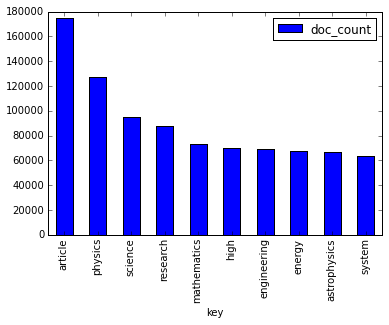

In [85]:
from matplotlib import pyplot
%matplotlib inline

top_subjects_dataframe.plot(kind='bar', x='key', y='doc_count')
pyplot.show()

### Complex Queries and Dataframes

Let's make a new search, for all documents updated in the years 2012 to 2015 that contain the subject "science."

In [86]:
science_search = ShareSearch() #create search object
science_search = science_search.filter( #apply filter to search
    "range", #applied a range type filter
    providerUpdatedDateTime={ #the feild in the data we compare
        'gte':'2012-01-01', #hits must be greater than or equal to this date and...
        'lte':'2015-12-31' #hits must be less than or equal to this date
    }
)

In [87]:
science_search = science_search.filter(
     "prefix",
     subjects="science"
)

science_search.aggs.bucket(
    'sources',
    'significant_terms',
    field='_type',
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='_type', min_doc_count=1, percentage={}, size=0)

### Take a look at the query we've built

In [88]:
pretty_print(science_search.to_dict())

{
    "query": {
        "filtered": {
            "filter": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "providerUpdatedDateTime": {
                                    "gte": "2012-01-01", 
                                    "lte": "2015-12-31"
                                }
                            }
                        }, 
                        {
                            "prefix": {
                                "subjects": "science"
                            }
                        }
                    ]
                }
            }, 
            "query": {
                "match_all": {}
            }
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
   

### Make the query, and graph the result

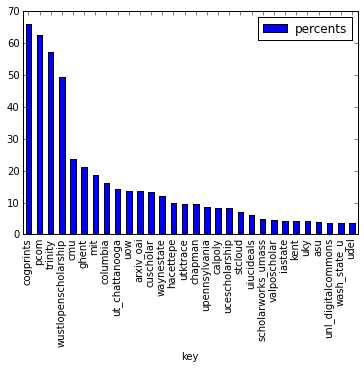

In [89]:
import pandas as pd
from matplotlib import pyplot

%matplotlib inline

science_search_results = science_search.execute()

science_results = science_search_results.aggregations.sources.to_dict()  
science_data_frame = pd.DataFrame(science_results['buckets']) 

science_data_frame['percents'] = (science_data_frame['score'] * 100)

science_data_frame[:30].plot(kind='bar', x='key', y='percents') # Limit to the first 30 results for readability

pyplot.show()

### Plot Number of Documents by Source

We'll limit it to the top 30 sources to make sure that the graph is readable.

In [90]:
from sharepa import bucket_to_dataframe

all_results = ShareSearch()

all_results = all_results.query(
    'query_string',
    query='*',
    analyze_wildcard=True
)

all_results.aggs.bucket(
    'sources',
    'terms',
    field='_type',
    size=0,
    min_doc_count=0
)

Terms(field='_type', min_doc_count=0, size=0)

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


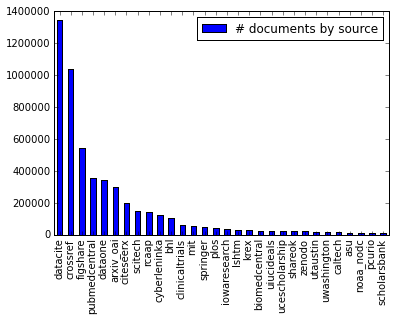

In [91]:
all_results = all_results.execute()

all_results_frame = bucket_to_dataframe(
    '# documents by source',
    all_results.aggregations.sources.buckets
)

all_results_frame_sorted = all_results_frame.sort(
    ascending=False,
    columns='# documents by source'
)

all_results_frame_sorted[:30].plot(kind='bar')

### Different Kinds of Charts

Let's make a pie chart

- Limited to 10 sources

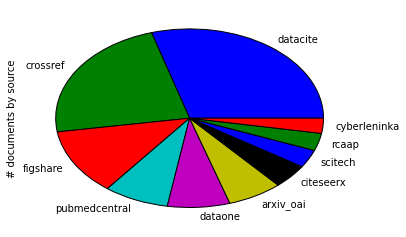

In [92]:
all_results_frame_sorted[:10].plot(kind='pie', y="# documents by source", legend=False)

## SHARE Data in the Wide World

Here are some examples of how to get SHARE data into different formats

### Exporting a DataFrame to csv and Excel

Let's do a query and then export the results to different formats.

We're interested in the number of documents from each source that have a description.

In [93]:
description_search = ShareSearch()

description_search = description_search.query(
    'query_string', 
    query='description:*',
    analyze_wildcard=True
)

description_search.aggs.bucket(
    'sources',
    'significant_terms',
    field='_type',
    min_doc_count=0,
    percentage={},
    size=0
)

description_results = description_search.execute()

### Cleaning up our dataframe

In [94]:
description_dataframe = pd.DataFrame(description_results.aggregations.sources.to_dict()['buckets'])

# We will add our own "percent" column to make things clearer
description_dataframe['percent'] = (description_dataframe['score'] * 100)
# And, drop the old score column
description_dataframe = description_dataframe.drop('score', 1)

# Let's set the source name as the index, and then drop the old column
description_dataframe = description_dataframe.set_index(description_dataframe['key'])
description_dataframe = description_dataframe.drop('key', 1)

In [95]:
# Finally, we'll show the results!
description_dataframe

,bg_count,doc_count,percent
key,,,
fit,5,5,100.000000
mason,25,25,100.000000
nist,3,3,100.000000
umassmed,3,3,100.000000
uncg,8459,8459,100.000000
pcurio,12072,12044,99.768058
dailyssrn,6894,6878,99.767914
ut_chattanooga,280,279,99.642857
addis_ababa,1916,1878,98.016701


### Exporting to CSV and Excel formats

Pandas has handy tools built in that makes converting a dataframe very easy

In [96]:
description_dataframe.to_csv('exported_data/SHARE_Counts_with_Descriptions.csv')
description_dataframe.to_excel('exported_data/SHARE_Counts_with_Descriptions.xlsx')

### Working with Outside Data

Here's a quick example of how you could work with a list of names, and use them to see what information is in SHARE

In [97]:
names = ["Susan Jones", "Ravi Patel"]

In [98]:
name_search = ShareSearch()

for name in names:
    name_search = name_search.query(
        {
            "bool": {
                "should": [
                    {
                        "match": {
                            "contributors.name": {
                                "query": name, 
                                "operator": "and",
                                "type" : "phrase"
                            }
                        }
                    }
                ]
            }
        }
    )


name_results = name_search.execute()

In [99]:
print(
    'There are {} documents with contributors who have any of those names.'.format(
        name_search.count()
    )
)

print('Here are the first 10:')
print('---------')
for result in name_results:
    print(
        '{} -- with contributors {}'.format(
            result.title.encode('utf-8'),
            ', '.join([contributor.name.encode('utf-8') for contributor in result.contributors])
        )
    )

There are 38 documents with contributors who have any of those names.
Here are the first 10:
---------
Short- and Long-Term Outcomes for Extremely Preterm Infants -- with contributors Ravi Patel
"Prospective, Randomized, Multi-Center, Efficacy Non-inferiority Study of MEDIHONEY® Gel Versus Collagenase for Wound Debridement" -- with contributors Ravi Patel, MD
Obstetrical and Neonatal Perspectives on Prematurity -- with contributors Tracy Manuck, Ravi Patel
Representative structures of bHLH proteins from the Protein Data Bank -- with contributors Susan Jones
Evolutionary tree for SMC proteins, created using PHYLIP 69,70 -- with contributors Susan Jones, John Sgouros
Assessing the Fitness of an Academic Library for Doctoral Research -- with contributors Edwards, Susan ; Jones, Lynn ;
‘It’s not what it looks like. I’m Santa’: Connecting Community through Film -- with contributors Susan Jones, Joanna McIntyre
The cohesion interaction network -- with contributors Susan Jones, John Sgouros
S

### Where did these results come from?

We can add an aggregation!

In [100]:
name_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations, terms is a pretty useful one though
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    size=0,  # These are just to make sure we get numbers for all the sources, to make it easier to combine graphs
    min_doc_count=1
)

name_results = name_search.execute()

pd.DataFrame(name_results.aggregations.sources.to_dict()['buckets'])

,doc_count,key
0,12,datacite
1,11,crossref
2,7,pubmedcentral
3,3,clinicaltrials
4,1,arxiv_oai
5,1,citeseerx
6,1,figshare
7,1,mblwhoilibrary
8,1,utaustin


### Searching by ORCID 

In [101]:
orcids = [
    'http://orcid.org/0000-0003-1942-4543',
    'http://orcid.org/0000-0003-4875-1447',
    'http://orcid.org/0000-0002-6085-4433',
    'http://orcid.org/0000-0002-7995-9948',
    'http://orcid.org/0000-0002-2170-853X',
    'http://orcid.org/0000-0002-8899-9087'
]

In [102]:
orcid_search = ShareSearch()

for orcid in orcids:
    orcid_search = orcid_search.query(
        {
            "bool": {
                "should": [
                    {
                        "match": {
                            "contributors.sameAs": {
                                "query": orcid, 
                                "operator": "and",
                                "type" : "phrase"
                            }
                        }
                    }
                ]
            }
        }
    )

In [103]:
orcid_search.aggs.bucket(
    'sources',
    'terms',
    field='_type',
    size=0,
    min_doc_count=1
)

orcid_results = orcid_search.execute()

In [104]:
print(
    'There are {} documents with contributors who have any of those orcids.'.format(
        orcid_search.count()
    )
)

all_agg_df = pd.DataFrame()
all_agg_df['title'] = [result.title for result in orcid_results]
all_agg_df['docID'] = [result.shareProperties.docID for result in orcid_results]
all_agg_df['source'] = [result.shareProperties.source for result in orcid_results]
all_agg_df

There are 12 documents with contributors who have any of those orcids.


,title,docID,source
0,Widespread shortening of 3' untranslated regio...,10.1101/026831,crossref
1,COMADRE: a global database of animal demography,10.1101/027821,crossref
2,A psychometric analysis of outcome measures in...,10.1136/annrheumdis-2014-207235,crossref
3,Light-induced indeterminacy alters shade avoid...,10.1101/024018,crossref
4,Optimisation of a treat-to-target approach in ...,10.1136/annrheumdis-2015-208324,crossref
5,A selfish genetic element drives recurring sel...,10.1101/024851,crossref
6,Pharmacological treatment of psoriatic arthrit...,10.1136/annrheumdis-2015-208466,crossref
7,The many evolutionary fates of a large segment...,10.1101/043687,crossref
8,"In wealthier countries, patients perceive wors...",10.1136/annrheumdis-2015-207738,crossref
9,The changing landscape of biosimilars in rheum...,10.1136/annrheumdis-2016-209166,crossref


## This is just the surface!

The SHARE API has the potential to answer many questions about our data

Data curation and enhancement will only make these analasyes more interesting.

# Thank you!

## Questions?

**email**: erin@cos.io

*SHARE Technical Documentation and Information*: https://osf.io/t3j94/

*these slides and example notebooks*:  https://osf.io/bygau/